<a href="https://colab.research.google.com/github/m607stars/Machine-Learning-Algorithms/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regresison**
It is generally used for categorical classification like if a person is veg/non-veg or classifiying an email as spam or not spam.

It has the same hypothesis as that of the linear regression except for the fact that it uses the logistic function. Logistic function is a function of a variable x having a S-shaped curve and is given by 

![alt text](https://drive.google.com/uc?id=1lyWmjy9j4cxn1_Z0qsKzDULXb4m8XCfQ)


 where L,k,x0 are constants

The sigmoid function is used as the logistic function. Sigmoid funcion is given by 

![alt text](https://drive.google.com/uc?id=1v3LiP4rc2fWZgp6AiCdRUr_h_Ig1S18Q)

What sigmoid function does is basically it squeezes the value of input which can lie in the range of real numbers to the range (0,1). 

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  #Matplotlib is used for plotting grpahs, histograms, etc.

from sklearn.linear_model import LogisticRegression         #sklearn contians all pre-defined models, like linear regression, logistic regresion,etc.

In [ ]:
#Mount google drive on colab. The dataset is uploaded on Google Drive 

from google.colab import drive          
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the data from the path specified. We have taken the very famous Iris Data Set.
#read our dataset into a dataframe labelled data with the help of pandas. 
#We copy paste the path where our dataset was present in the drive.
#Since our data is in a csv file we use pd.read_csv

data = pd.read_csv('/content/drive/My Drive/Iris Data Set.csv')

In [ ]:
#We display the data 
data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


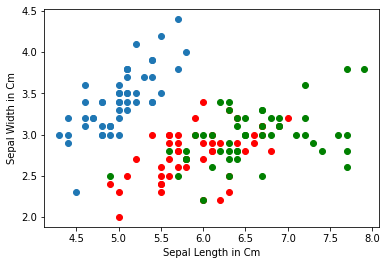

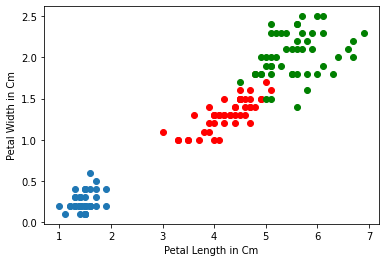

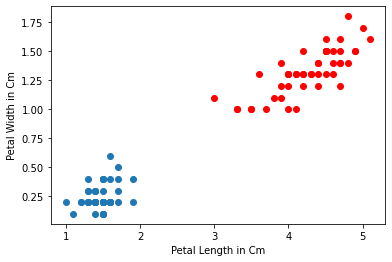

In [ ]:
#plot the graph

plt.scatter(data['SepalLengthCm'][:50],data['SepalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['SepalLengthCm'][50:100],data['SepalWidthCm'][50:100],color='red')        
plt.scatter(data['SepalLengthCm'][100:],data['SepalWidthCm'][100:],color='green')        
plt.xlabel("Sepal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Sepal Width in Cm")
plt.show() 

plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')        
plt.scatter(data['PetalLengthCm'][100:],data['PetalWidthCm'][100:],color='green')        
plt.xlabel("Petal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Petal Width in Cm")
plt.show() 

plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')              
plt.xlabel("Petal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Petal Width in Cm")
plt.show() 


In [ ]:
#For classification we rename the species of the flowers as 0,1,2

data["Species"].replace({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}, inplace=True)
data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


For simplicity we try to classify only the Iris-setosa and the Iris-versicolor on the basis of their sepal width only. For simplicity we have taken only one feature. Here we have used Logistic regression for binary classification. 

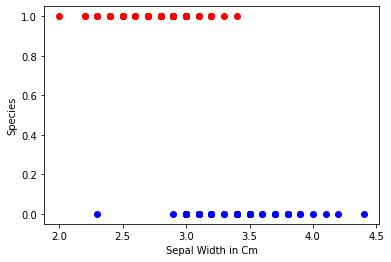

In [ ]:
#we plot the data for sepal widths of the two classes taken into consideration. 
#For classifiaction and regression purposes we have used the integers as species

plt.scatter(data['SepalWidthCm'][:50],data['Species'][:50],color='blue')                          #plotting points on a graph 
plt.scatter(data['SepalWidthCm'][50:100],data['Species'][50:100],color='red')               
plt.xlabel("Sepal Width in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Species")
plt.show() 

In [ ]:
#We reshape the vector as when we read the data from csv we read it as a vector. 
#We reshape the vector so that we get a vector of 1 dimension only 

X = data['SepalWidthCm'].values.reshape(-1,1)
Y = data['Species'].values.reshape(-1,1)

Cost function is given by  

![alt text](https://drive.google.com/uc?id=1h52Pca9WVhCxI9h9KrUxAfefiSL3KE5i)

It can also be written as 

J(m) = - [ylog(p) + (1-y)log(1-p)]

This is written taking into consideration that m is a single scalar quantity. However usually, m is a vector quantity and then we take the sum of all the vector values and average it out. So the cost function becomes 

![alt text](https://drive.google.com/uc?id=1OZqgu2tG6m8uAFtJhmPeaZKOndckWSMZ)


But here we have used our normal mean squared error loss just for simplicity !

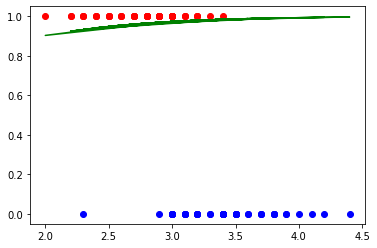

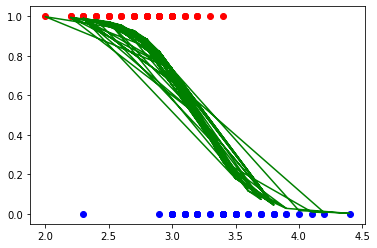

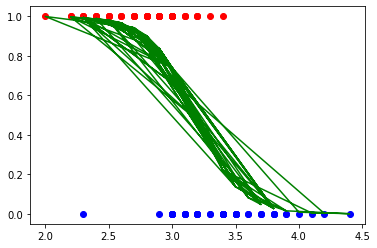

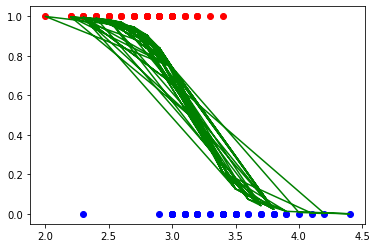

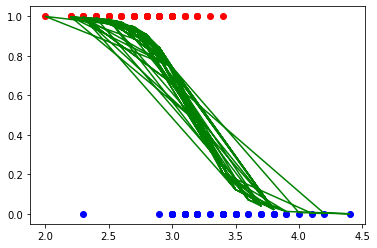

[-6.06835651] [19.2676634]


In [ ]:
#initialize m and c randomly. m and c are the weights  
m=3
c=0
alpha=0.01            
epochs = 10000
e=2.71828

#We define the sigmoid function 
def sigmoid(n):
  return 1/(1+ e**(-n))

#we define the Logistic Regression Function as given 
#In the function, np is our probability hypothesis. For the probability to be between 0 and 1 we used sigmoid function. m is the weight assumed.
#So hp gives us the probability that y=1 on giving the input x

def Logistic_Regression(x,y,alpha,m,c):
  hp = sigmoid(m*x+c)         
  dL_dm = -(y-hp)*x                   
  dL_dc = -(y-hp)
  m = m - alpha*(dL_dm) 
  c = c - alpha*(dL_dc) 
  return m,c

#we run the loop for specific number of epochs to get the desired result
#In each epochs the logistic function is applied on every training example and the weights are updated

for i in range (epochs):
  for j in range (100):
    m,c = Logistic_Regression(X[j],Y[j],alpha,m,c)
  if(i%2000==0):                                                                      #we plot the graph on specific iterations only 
    plt.scatter(data['SepalWidthCm'][:50],data['Species'][:50],color="blue")              #plotting the data points
    plt.scatter(data['SepalWidthCm'][50:100],data['Species'][50:100],color="red")
    x_plot = data['SepalWidthCm']
    y_plot = sigmoid((x_plot)*m+c)                                #predicting y from current m and c values
    plt.plot(x_plot,y_plot,color='green')                   #plotting regression line
    plt.show()

#Print the weights(the variables we initialiized randolmly)
print(m,c)

-3.3436279414844896
10.321006467801725


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


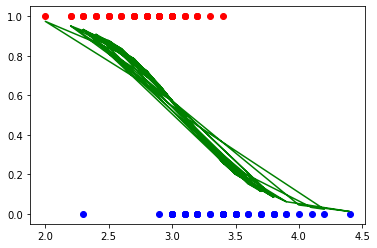

In [ ]:
#we are using the logistic regression function available in the sklearn libraray for comparison 

reg = LogisticRegression()
reg.fit(X[:100],Y[:100])

print(reg.coef_[0][0])
print(reg.intercept_[0])

m_lib=reg.coef_[0][0]
c_lib=reg.intercept_[0]

#we plot the graph using the weights produced by the logistic regression function 

plt.scatter(data['SepalWidthCm'][:50],data['Species'][:50],color="blue")              #plotting the data points
plt.scatter(data['SepalWidthCm'][50:100],data['Species'][50:100],color="red")
x_plot = data['SepalWidthCm'][:100]
y_plot = sigmoid((x_plot)*m_lib+c_lib)                                #predicting y from current m and c values
plt.plot(x_plot,y_plot,color='green')                   #plotting regression curve
plt.show()